<div style="width:100%;text-align: center;"> <img align=middle src="https://media0.giphy.com/media/nKG86WRlokFfW/giphy.gif" alt="Heat beating" style="height:366px;margin-top:3rem;"> </div>

# <h1 style='background:#ffd90f; border:0; color:white'><center>EDA:👀Simpsons Viewership</center></h1> 

# **<span style="color:#cd486b;">📰About the Dataset</span>**

Episode and viewer data pertaining to the first air date from season 1-28.

# **<span style="color:#cd486b;">📁About the files</span>**

We will be exploring the Simpsons-episodes dataset having following columns:

> Unique ID

> Episode Title

> original_air_date

> Production Code

> Episode Season and more

In [1]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt

Notebook Color Scheme: 


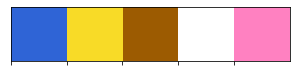

In [2]:
#Custom Colors
class clr:
    S = '\033[1m' + '\033[96m'
    E = '\033[0m'
    
my_colors = ["#2f64d6", "#f8db27", "#9c5b01", "#ffffff", "#ff81c1"]

print(clr.S + "Notebook Color Scheme: " + clr.E)
sns.palplot(sns.color_palette(my_colors))

# **<span style="color:#cd486b;">📃Lets get the data</span>**

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/simpsons-episodes-2016/ViewsByTitle.csv
/kaggle/input/simpsons-episodes-2016/simpsons_episodes.csv
/kaggle/input/simpsons-episodes-2016/simpsons_characters.csv


In [4]:
df = pd.read_csv('/kaggle/input/simpsons-episodes-2016/simpsons_episodes.csv')


In [5]:
df.head()

,id,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating
0,10,Homer's Night Out,3/25/90,7G10,1,10,10,30.3,50816.0,7.4
1,12,Krusty Gets Busted,4/29/90,7G12,1,12,12,30.4,62561.0,8.3
2,14,"Bart Gets an ""F""",10/11/90,7F03,2,1,14,33.6,59575.0,8.2
3,17,Two Cars in Every Garage and Three Eyes on Eve...,11/1/90,7F01,2,4,17,26.1,64959.0,8.1
4,19,Dead Putting Society,11/15/90,7F08,2,6,19,25.4,50691.0,8.0


In [6]:
df.describe()

,id,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating
count,600.000000,600.000000,600.000000,600.000000,594.000000,596.000000,597.000000
mean,300.500000,14.100000,11.585000,300.500000,11.842795,48759.377517,7.386097
std,173.349358,7.755444,6.549881,173.349358,6.414218,17751.308464,0.732439
min,1.000000,1.000000,1.000000,1.000000,2.320000,144.000000,4.500000
25%,150.750000,7.000000,6.000000,150.750000,7.055000,41301.750000,6.900000
50%,300.500000,14.000000,11.000000,300.500000,10.300000,46036.000000,7.300000
75%,450.250000,21.000000,17.000000,450.250000,15.250000,57593.750000,8.000000
max,600.000000,28.000000,25.000000,600.000000,33.600000,171408.000000,9.200000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      600 non-null    int64  
 1   title                   600 non-null    object 
 2   original_air_date       600 non-null    object 
 3   production_code         600 non-null    object 
 4   season                  600 non-null    int64  
 5   number_in_season        600 non-null    int64  
 6   number_in_series        600 non-null    int64  
 7   us_viewers_in_millions  594 non-null    float64
 8   views                   596 non-null    float64
 9   imdb_rating             597 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 47.0+ KB


In [8]:
df.columns

Index(['id', 'title', 'original_air_date', 'production_code', 'season',
       'number_in_season', 'number_in_series', 'us_viewers_in_millions',
       'views', 'imdb_rating'],
      dtype='object')

In [9]:
# id seems to be of no use to us. so, we can drop it

df.drop('id', axis = 1, inplace = True)

In [10]:
df.head()

,title,original_air_date,production_code,season,number_in_season,number_in_series,us_viewers_in_millions,views,imdb_rating
0,Homer's Night Out,3/25/90,7G10,1,10,10,30.3,50816.0,7.4
1,Krusty Gets Busted,4/29/90,7G12,1,12,12,30.4,62561.0,8.3
2,"Bart Gets an ""F""",10/11/90,7F03,2,1,14,33.6,59575.0,8.2
3,Two Cars in Every Garage and Three Eyes on Eve...,11/1/90,7F01,2,4,17,26.1,64959.0,8.1
4,Dead Putting Society,11/15/90,7F08,2,6,19,25.4,50691.0,8.0


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'number_in_season'}>],
       [<AxesSubplot:title={'center':'number_in_series'}>,
        <AxesSubplot:title={'center':'us_viewers_in_millions'}>],
       [<AxesSubplot:title={'center':'views'}>,
        <AxesSubplot:title={'center':'imdb_rating'}>]], dtype=object)

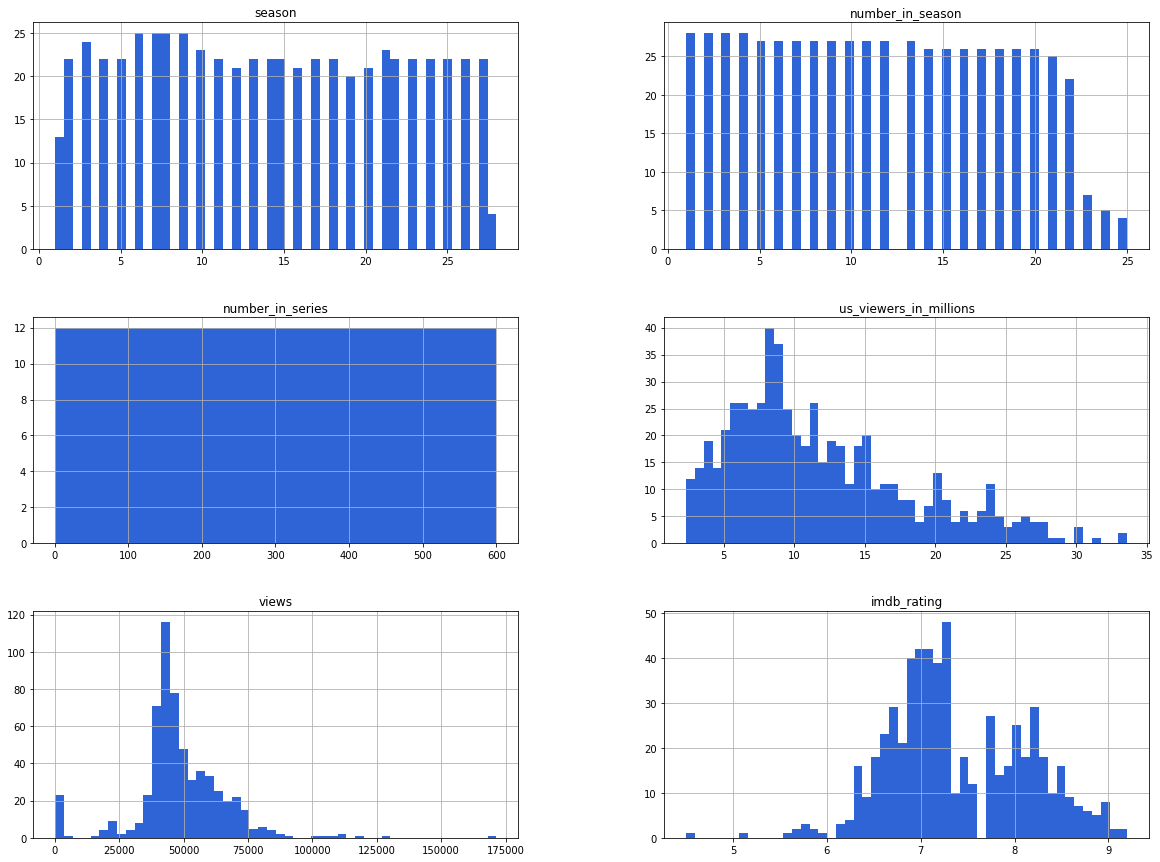

In [11]:
df.hist(bins = 50, figsize = (20,15), color = my_colors[0])

# **<span style="color:#ffd90f;">🥽Let's see what all we can explore in this dataset</span>**

> Which episode had highest Views

> Which season has maximum Views

> Which episode got maximum US viewership

> Which episode has highest imdb rating

> Which episode has lowest imdb rating



## **<span style="color:#2f64d6;">1️⃣Which episode had highest Views</span>**


In [12]:
max_views = df['views'].max()
episode = df.loc[df['views'] == max_views, 'title'].iloc[0]

print('Episode - "', episode, '" got maximum views -', max_views)

Episode - " Simpsons Roasting on an Open Fire " got maximum views - 171408.0


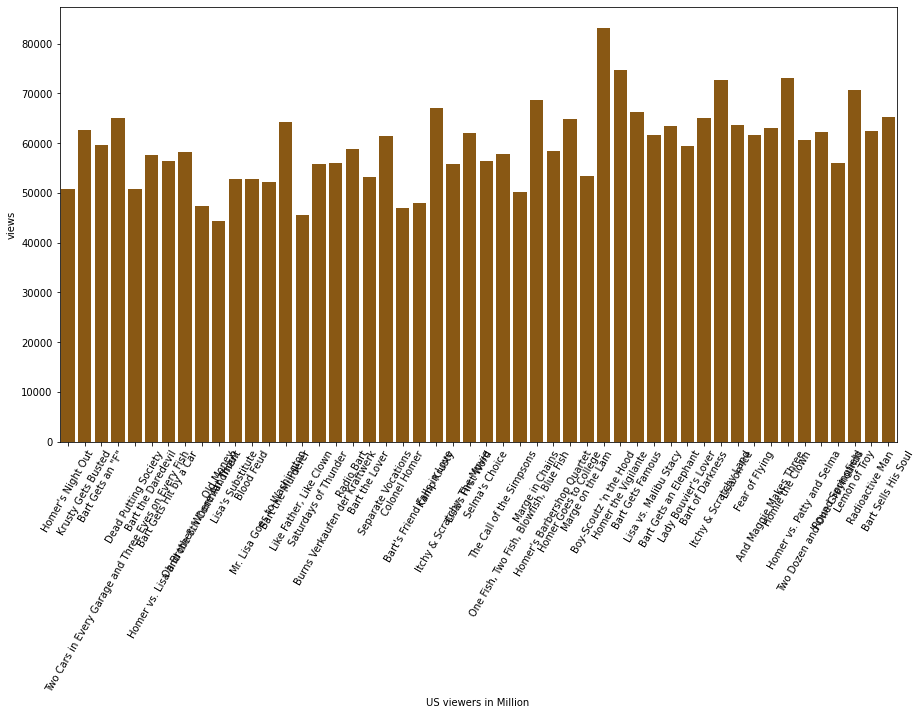

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x =df['title'][:50],y = df['views'][:50], color = my_colors[2])
plt.xlabel('US viewers in Million')
plt.xticks(rotation = 60)
plt.show()

## **<span style="color:#2f64d6;">2️⃣Which season has maximum Views</span>**


In [14]:
max_season = df.loc[df['views'] == max_views, 'season'].iloc[0]

print('Simpsons season', max_season, 'got maximum views')


Simpsons season 1 got maximum views


## **<span style="color:#2f64d6;">3️⃣Which episode got maximum US viewership</span>**


In [15]:
max_viewers = df['us_viewers_in_millions'].max()
episode = df.loc[df['us_viewers_in_millions'] == max_viewers, 'title'].iloc[0]

print('Episode - "', episode, '" got maximum US Viewers -', max_viewers, 'million')

Episode - " Bart Gets an "F" " got maximum US Viewers - 33.6 million


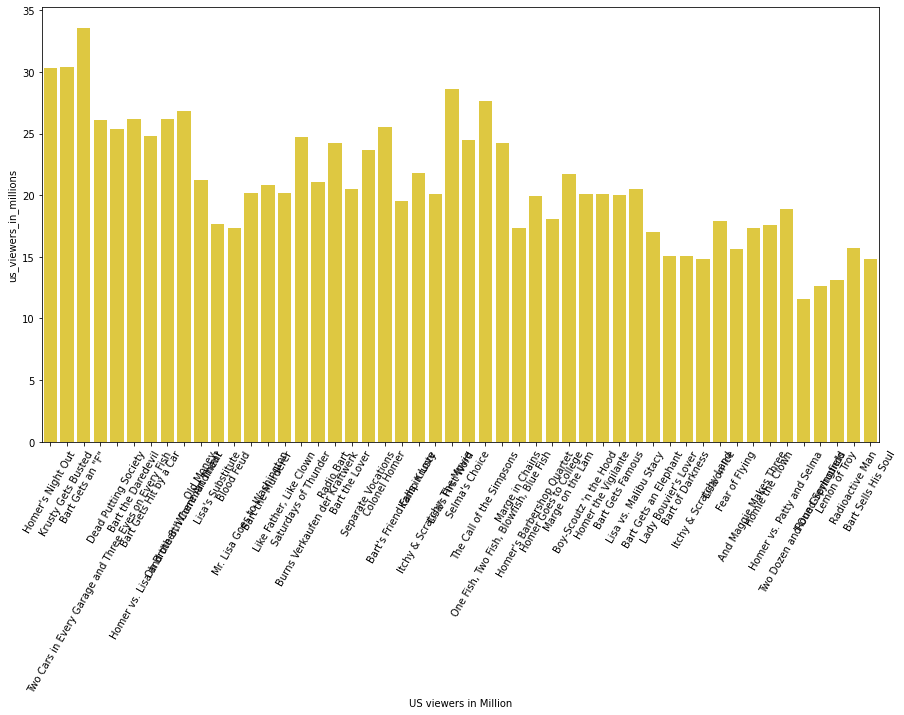

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x =df['title'][:50],y = df['us_viewers_in_millions'][:50], color = my_colors[1])
plt.xlabel('US viewers in Million')
plt.xticks(rotation = 60)
plt.show()

## **<span style="color:#2f64d6;">4️⃣Which episode has highest imdb rating</span>**


In [17]:
max_rating = df['imdb_rating'].max()
episode_rating = df.loc[df['imdb_rating'] == max_rating, 'title'].iloc[0]

print('Episode - "', episode_rating, '" got maximum imdb rating of -', max_rating)

Episode - " You Only Move Twice " got maximum imdb rating of - 9.2


## **<span style="color:#2f64d6;">5️⃣Which episode has lowest imdb rating</span>**

In [18]:
min_rating = df['imdb_rating'].min()
episode_rating = df.loc[df['imdb_rating'] == min_rating, 'title'].iloc[0]

print('Episode - "', episode_rating, '" got minimum imdb rating of -', min_rating)

Episode - " Lisa Goes Gaga " got minimum imdb rating of - 4.5


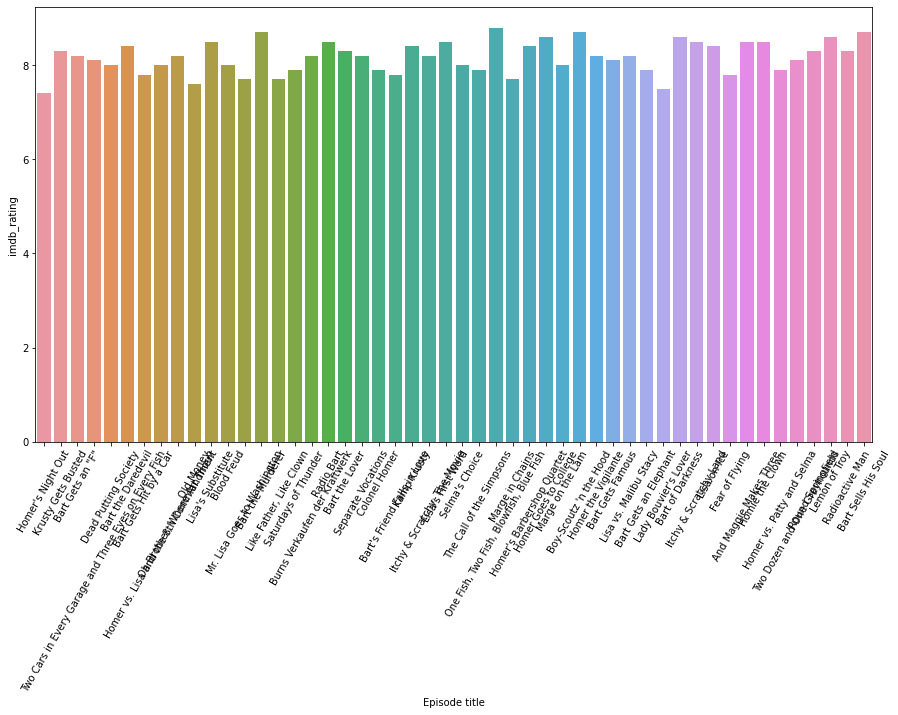

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x =df['title'][:50],y = df['imdb_rating'][:50])
plt.xlabel('Episode title')
plt.xticks(rotation = 60)
plt.show()

# **<span style="color:#ff81c1;">Conclusion</span>**
------------------------

**<span style="color:#000000;">This is the end of 👀EDA: Simpsons.</span>** 

**<span style="color:#000000;"> Stay Tuned for more EDA Analysis</span>** 

**<span style="color:#000000;">Please share your feedback and suggestions and help me improve 😇 </span>** 